# Tutorial: Epidemiology Models


## Computational Economics  (ECO309)



H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
In each period, one agent meets another agent drawn randomly.
During a meeting Susceptible agents who meet an infected agent, will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. Nothing happens to Recovered agents who meet other people. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



__Compute the transition function `f` for the vector state $s_t$ returning $s_{t+1}$__



__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



__We now assume a Susceptible person who meets an infected one has a probability $\mu$ of catching the disease. Update the transition function. Update function $f$ and write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"? How would you choose parameters $\Pi$ and $\mu$__ 

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$  stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



In [2]:
struct Status
    state::Int8
end

struct Agent
    x::Float64
    y::Float64
    status::Status
end

struct Parameters
    π::Float64
    μ::Float64
    σ::Float64
    r::Float64
end

In [3]:
p0 = Parameters(0.1, 0.1, 0.001, 0.1)

Parameters(0.1, 0.1, 0.001, 0.1)

In [4]:
rand() # uniform between 0 and 1

0.5635454056856684

In [5]:
const SUSCEPTIBLE = Status(0)
const INFECTED = Status(1)
const RECOVERED = Status(2)

Status(2)

In [6]:
Agent() = Agent(rand(), rand(), SUSCEPTIBLE)

Agent

In [7]:
Agent()

Agent(0.9321507308941688, 0.9125899999676816, Status(0))

In [8]:
N = 100

100

In [9]:
population = [Agent() for i=1:N]

100-element Vector{Agent}:
 Agent(0.628775526315654, 0.7747187339300827, Status(0))
 Agent(0.848203633522232, 0.12697652589887465, Status(0))
 Agent(0.3770730637725206, 0.6518910908952857, Status(0))
 Agent(0.5858942210794518, 0.9315300981592123, Status(0))
 Agent(0.9355437044101396, 0.01257220054159136, Status(0))
 Agent(0.0028969107658058935, 0.7063256479188373, Status(0))
 Agent(0.7093600220340011, 0.38687950925069736, Status(0))
 Agent(0.39101974989637966, 0.7702746583032465, Status(0))
 Agent(0.9780100962658798, 0.7733381341853336, Status(0))
 Agent(0.3050038561296904, 0.3910848311360444, Status(0))
 Agent(0.2852412500502912, 0.15063632807752292, Status(0))
 Agent(0.017203804189477978, 0.5087081675152239, Status(0))
 Agent(0.25535255761686404, 0.17367674782088405, Status(0))
 ⋮
 Agent(0.1941335667477393, 0.2838472092184854, Status(0))
 Agent(0.21633766104898777, 0.1966735094373273, Status(0))
 Agent(0.6831569995645241, 0.8920419336580139, Status(0))
 Agent(0.9622417953536797, 0.39

__Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



In [10]:
function move(agent::Agent, p::
        Parameters)
    x = agent.x + randn()*p.σ
    y = agent.y + randn()*p.σ
    return Agent(x, y, agent.status)
end

move (generic function with 1 method)

In [11]:
s = Agent()

Agent(0.47223716356217693, 0.6635242305673732, Status(0))

In [12]:
move(s, p0)

Agent(0.47378596063805917, 0.665414145159432, Status(0))

In [13]:
function spatial_transition(S::Vector{Agent}, p::Parameters)
    out = [move(agent, p) for agent in S]
    return out
end

spatial_transition (generic function with 1 method)

In [14]:
spatial_transition(population, p0)

100-element Vector{Agent}:
 Agent(0.6291229889106399, 0.774070225270899, Status(0))
 Agent(0.8492560959259334, 0.12722132837173722, Status(0))
 Agent(0.3767834602439938, 0.6531753736840068, Status(0))
 Agent(0.5855802186575476, 0.9314864791265248, Status(0))
 Agent(0.9355728554104757, 0.0147052591465586, Status(0))
 Agent(0.002418270849616774, 0.7063249119204462, Status(0))
 Agent(0.707917249104527, 0.38881840471119206, Status(0))
 Agent(0.39094335960860116, 0.771927538997568, Status(0))
 Agent(0.9777438556540287, 0.7739879703309611, Status(0))
 Agent(0.3059470622744458, 0.39105261241885153, Status(0))
 Agent(0.2846707776844322, 0.1501994827208828, Status(0))
 Agent(0.016439024784622704, 0.5086506588124433, Status(0))
 Agent(0.2544781760434176, 0.17513164699524292, Status(0))
 ⋮
 Agent(0.19468554246935676, 0.28493805370350134, Status(0))
 Agent(0.2157212801784034, 0.19605624712784833, Status(0))
 Agent(0.6841183772626205, 0.8917157204512453, Status(0))
 Agent(0.9619082508405186, 0.3914

In [15]:
function random_guess(p0, T=100, N=100)
    population = [Agent() for n =1:N]
    for t in 1:T
        population = spatial_transition(population, p0)
    end
    return population
    
end

random_guess (generic function with 3 methods)

In [16]:
random_guess(p0)

100-element Vector{Agent}:
 Agent(0.021148909567778883, 0.47314918146830615, Status(0))
 Agent(0.5089546321194396, 0.28884513251996013, Status(0))
 Agent(0.10491956415835271, 0.03417556625673566, Status(0))
 Agent(0.9648890196776359, 0.29156910851739715, Status(0))
 Agent(0.9550089218945547, 0.6302006590901906, Status(0))
 Agent(0.3373709215204663, 0.5974486029242638, Status(0))
 Agent(0.039620256025278466, 0.8244282387537727, Status(0))
 Agent(0.766594069080001, 0.16756944526349368, Status(0))
 Agent(0.43998997083123537, 0.38760080495602073, Status(0))
 Agent(0.8197449310709023, 0.4049939138409894, Status(0))
 Agent(0.7023572874176478, 0.9223123325033322, Status(0))
 Agent(0.7838120506296088, 0.003946385150953381, Status(0))
 Agent(0.3499841116914357, 0.4690434636787926, Status(0))
 ⋮
 Agent(0.4706292315132484, 0.9633774556626334, Status(0))
 Agent(0.11601326441296803, 0.21677391220315914, Status(0))
 Agent(0.1360317989573984, 0.3051995851284062, Status(0))
 Agent(0.06404029710874866,

__Write a function `show_population` to plot all agents with different colors for different health status.__



In [18]:
import Plots: plot, plot!

In [19]:
using Plots # imports all functions that are "exported"

┌ Warning: Skipped marker arg ..
└ @ Plots /home/pablo/.julia/packages/Plots/8K4be/src/args.jl:1230


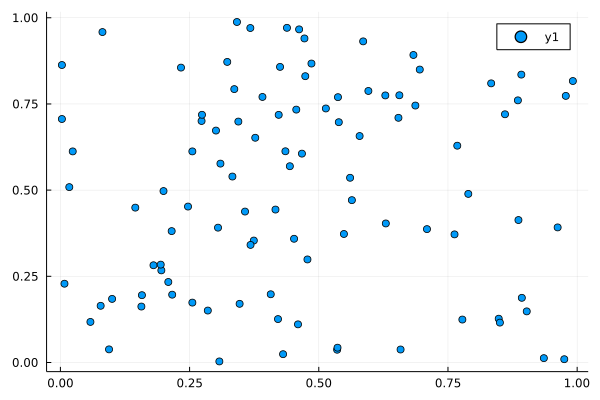

In [20]:
plot(
[a.x for a in population],
[a.y for a in population]; marker=".", seriestype=:scatter # should make lines invisible
)

┌ Warning: Skipped marker arg ..
└ @ Plots /home/pablo/.julia/packages/Plots/8K4be/src/args.jl:1230


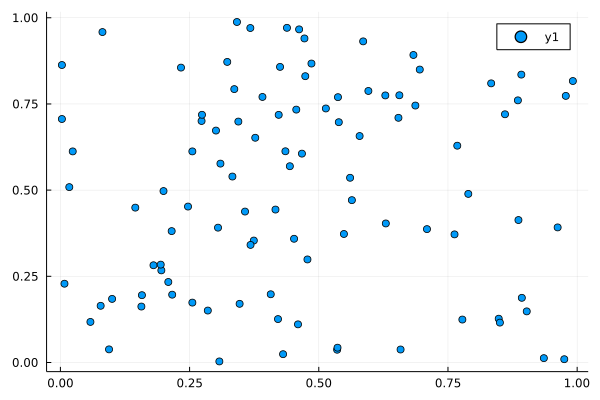

In [21]:
scatter(
[a.x for a in population],
[a.y for a in population]; marker=".", seriestype=:scatter # should make lines invisible
)

In [22]:
import Plots: plot

In [23]:
function plot(population::Vector{Agent})
    pl = scatter(
        [a.x for a in population],
        [a.y for a in population]; marker=".", seriestype=:scatter # should make lines invisible
    )
    return pl
end

plot (generic function with 5 methods)

In [30]:
pop0 = random_guess(p0);

┌ Warning: Skipped marker arg ..
└ @ Plots /home/pablo/.julia/packages/Plots/8K4be/src/args.jl:1230


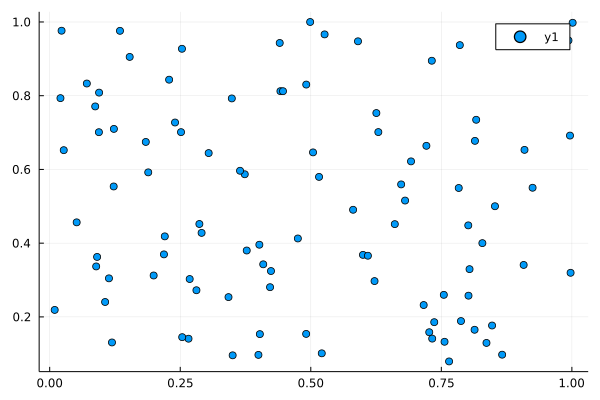

In [31]:
plot(pop0)

__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



In [26]:
import Base: -
(-)(a1, a2) = Agent( a1.x-a2.x, a1.y - a2.y, a1.status)

- (generic function with 251 methods)

In [27]:
distance(a1::Agent, a2::Agent) = sqrt( ((a2-a1).x)^2 + ((a2-a1).y)^2 )

distance (generic function with 1 method)

In [28]:
distance(Agent(), Agent())

0.5090802924591714

In [70]:
function evolve(S::Vector{Agent}, p::Parameters)
    S = spatial_transition(S, p)
    new_S = []
    for (i,agent) in enumerate(S)
        if agent.status == SUSCEPTIBLE
            
            risky_encounter = false
            for (j,oagent) in enumerate(S)
                if j!=i
                    d = distance(agent, oagent)
                    if (d<p.r) && (oagent.status == INFECTED)
                        risky_encounter=true
                        break
                    end
                end
                break
            end
            
            if risky_encounter
                if rand() < p.μ
                    new_agent = Agent(agent.x, agent.y, INFECTED)
                else
                    new_agent = agent
                end
            else
                new_agent = agent
            end
            
            
        elseif agent.status == INFECTED
            if rand() < p.π
                new_agent = Agent(agent.x, agent.y, RECOVERED)
            else
                new_agent = agent
            end
        elseif agent.status == RECOVERED
            new_agent = agent
        end
        
        push!(new_S, new_agent)
        
    end
    
    return new_S
    
end

evolve (generic function with 1 method)

In [71]:
infect(agent::Agent) = Agent(agent.x, agent.y, INFECTED)

infect (generic function with 1 method)

In [72]:
pop0[1] = infect(pop0[1])

Agent(0.441866421899041, 0.8123508004680626, Status(1))

In [73]:
evolve(pop0, p0)

100-element Vector{Any}:
 Agent(0.4400986434346771, 0.8131979953305294, Status(1))
 Agent(0.78591525472586, 0.938679005088445, Status(0))
 Agent(0.9974960146827153, 0.31911388887754416, Status(0))
 Agent(0.18839463783145038, 0.5914093128283494, Status(0))
 Agent(0.10703795332461867, 0.2415377529237061, Status(0))
 Agent(0.40189765364697577, 0.3942218375197692, Status(0))
 Agent(0.6278090339114756, 0.7000969921375494, Status(0))
 Agent(0.49849882061198286, 1.002173861309859, Status(0))
 Agent(0.4012144028963097, 0.15381332262052724, Status(0))
 Agent(0.5995126013762854, 0.36860720597926183, Status(0))
 Agent(0.7150538251648496, 0.23048985018664622, Status(0))
 Agent(0.8366926540976956, 0.13098169699111353, Status(0))
 Agent(0.13405582978722977, 0.9769724778529784, Status(0))
 ⋮
 Agent(0.8009668473739764, 0.44717266736615346, Status(0))
 Agent(0.39963701899944176, 0.09695743075130865, Status(0))
 Agent(0.730909838624037, 0.8957170083296532, Status(0))
 Agent(0.12202686189475535, 0.710833

__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



In [74]:
function simulate(S0::Vector{Agent}, p::Parameters; T=1)
    sim = [S0]
    for t=1:T
        pop = sim[end]
        push!(sim, evolve(pop, p))
    end
    return sim
end

simulate (generic function with 1 method)

In [76]:
sim = simulate(pop0, p0; T=100)

101-element Vector{Vector{Agent}}:
 [Agent(0.441866421899041, 0.8123508004680626, Status(1)), Agent(0.7854071329647904, 0.9372482823692116, Status(0)), Agent(0.9975409897421323, 0.31961377242256905, Status(0)), Agent(0.18872704600426163, 0.5920558147918156, Status(0)), Agent(0.10615016895963983, 0.24037685998821293, Status(0)), Agent(0.401518414766676, 0.395735934342022, Status(0)), Agent(0.6293589919021436, 0.7013413101083454, Status(0)), Agent(0.49880131265821676, 0.9999988537761209, Status(0)), Agent(0.4024638668258409, 0.15323105376578777, Status(0)), Agent(0.5999188515799793, 0.36821832736573823, Status(0))  …  Agent(0.731749120112525, 0.8948896273227398, Status(0)), Agent(0.12294544837412476, 0.7099547508813026, Status(0)), Agent(0.02690848676757432, 0.6522679193401205, Status(0)), Agent(0.8285987229784609, 0.4000528595082623, Status(0)), Agent(0.9247625025601486, 0.5503127753459159, Status(0)), Agent(0.8471722875835832, 0.17657205514505364, Status(0)), Agent(0.24002620565354532,

__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

In [81]:
count(pop::Vector{Agent}, state) = sum(a.status==state for a in pop)

count (generic function with 2 methods)

In [82]:
count(pop0, SUSCEPTIBLE)
count(pop0, SUSCEPTIBLE)

99

In [ ]:
p0.

In [108]:
p0 = Parameters(0.05, 0.5, 0.1, 0.2)



Parameters(0.05, 0.5, 0.1, 0.2)

In [109]:
sim = simulate(pop0, p0; T=100);

In [110]:
sim_n_S = [count(pop, SUSCEPTIBLE) for pop in sim]
sim_n_I = [count(pop, INFECTED) for pop in sim]
sim_n_R = [count(pop, RECOVERED) for pop in sim]


101-element Vector{Int64}:
  0
  0
  2
  3
  5
  5
  5
  6
  6
  6
  6
  6
  7
  ⋮
 27
 27
 27
 27
 27
 27
 27
 27
 27
 27
 27
 27

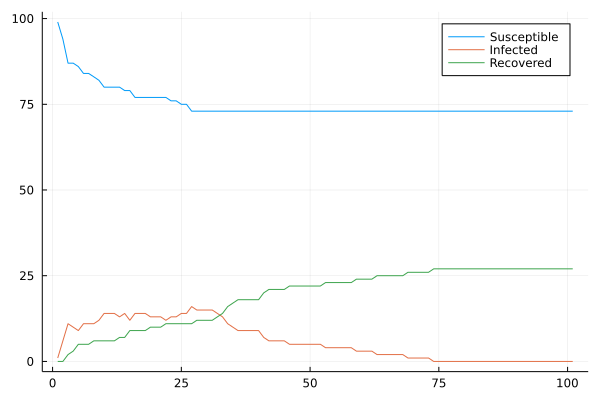

In [111]:
pl = plot(sim_n_S, label="Susceptible")
plot!(pl, sim_n_I, label="Infected")
plot!(pl, sim_n_R, label="Recovered")


### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)